# Customer Churn Prediction using ML Classification Algorithms
## by: Vineet Srivastava

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv('/content/data_regression.csv')
df.head(10)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
5,2015,101953,329-6603,NaN,31,65,no,no,193.65,12.7,21.95,111,6,4.0,4,1.0
6,2015,103051,416-1845,NaN,54,59,no,no,239.25,10.2,27.12,106,4,NaN,0,0.0
7,2015,103225,348-7193,Female,40,50,no,no,196.65,5.6,22.29,88,9,NaN,5,1.0
8,2015,103408,413-4039,Male,61,205,no,yes,263.70,7.8,29.89,64,5,3.0,2,0.0
9,2015,103676,338-5207,Male,31,63,no,no,316.80,12.3,35.90,58,2,4.0,0,0.0


In [104]:
def data_inspection(df):
    print('### type of variables we are working with')
    print(df.dtypes)
    
    print('### total samples with missing values')
    print(df.isnull().any(axis=1).sum())
    
    print('### total missing values per feature/variable')
    print(df.isnull().sum())
    
    print('### heatmap of missing values')
    print(sns.heatmap(df.isnull()))
    
    print('### data shape')
    print(df.shape)

### type of variables we are working with
year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object
### total samples with missing values
82
### total missing values per feature/variable
year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins     

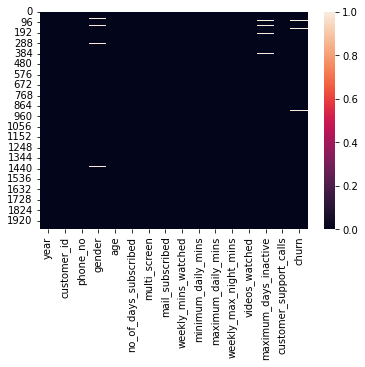

In [105]:
data_inspection(df)

In [106]:
def percent_missing(df):
    percent_nan = 100 *(df.isnull().sum()/(len(df)))
    percent_nan = percent_nan[percent_nan >0]
    return percent_nan

In [107]:
percent_nan = percent_missing(df)
percent_nan

gender                   1.20
maximum_days_inactive    1.40
churn                    1.75
dtype: float64

Text(0.5, 1.0, 'Features with missing values')

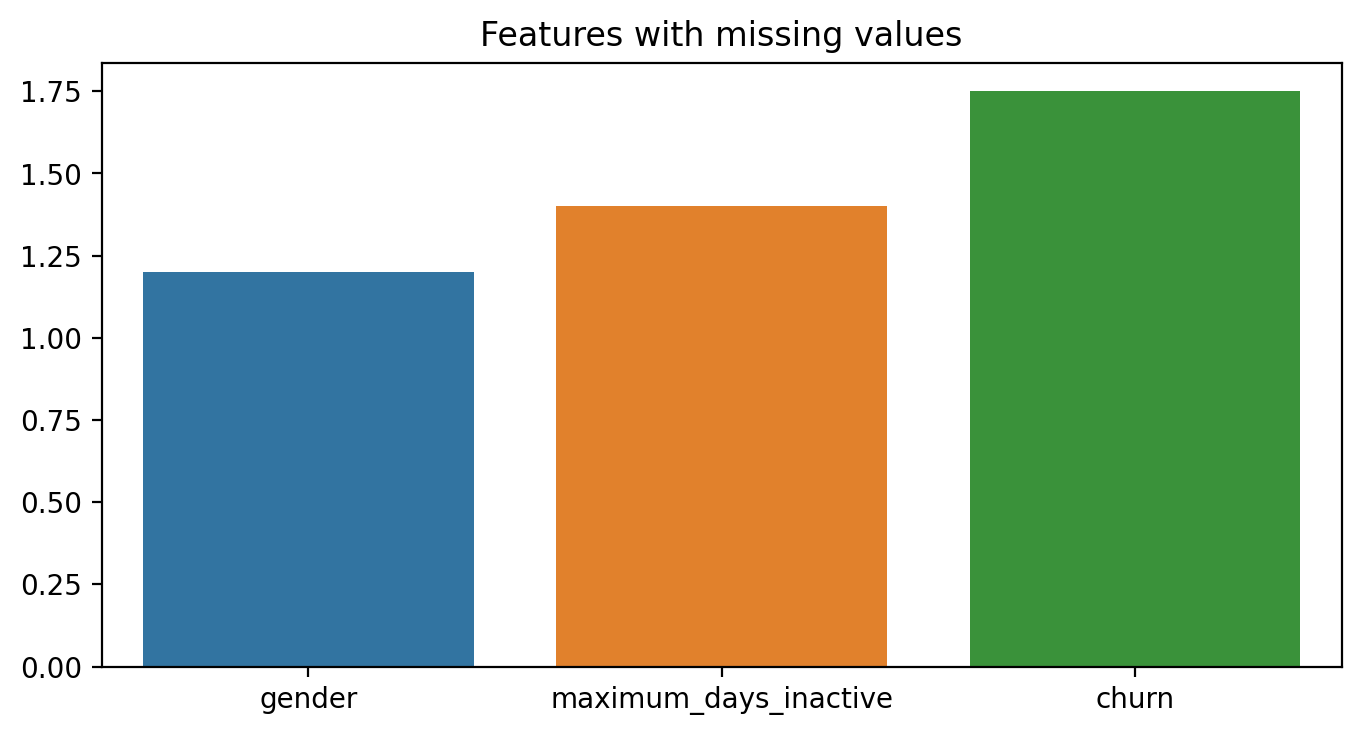

In [108]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(y=percent_nan,x=percent_nan.index)
plt.title('Features with missing values')

### There isn't much missing values so we can drop them

In [109]:
df = df.dropna(subset=['churn'])

In [110]:
percent_nan = percent_missing(df)
percent_nan

gender                   1.221374
maximum_days_inactive    1.323155
dtype: float64

In [111]:
df['gender'] = df['gender'].fillna('Male')

<ipython-input-111-b0370f08b1ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].fillna('Male')


In [112]:
percent_nan = percent_missing(df)
percent_nan

maximum_days_inactive    1.323155
dtype: float64

In [113]:
df['maximum_days_inactive'] = df['maximum_days_inactive'].fillna(df['maximum_days_inactive'].median())

<ipython-input-113-12b06ce651d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['maximum_days_inactive'] = df['maximum_days_inactive'].fillna(df['maximum_days_inactive'].median())


In [114]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

In [115]:
df['churn'].value_counts()

0.0    1703
1.0     262
Name: churn, dtype: int64

In [116]:
100*(262/(262+1703))

13.333333333333334

In [117]:
df = df.drop(['year','customer_id','phone_no'],axis=1)

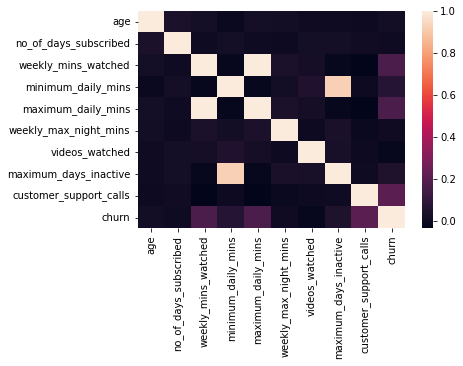

In [118]:
sns.heatmap(df.corr())

In [119]:
df.corr()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
age,1.000000,0.036144,0.017633,-0.006965,0.017644,0.011828,0.004724,-0.000168,-0.004859,0.011631
no_of_days_subscribed,0.036144,1.000000,-0.000302,0.015019,-0.000307,-0.002595,0.018411,0.018618,0.010115,0.002528
weekly_mins_watched,0.017633,-0.000302,1.000000,-0.021271,1.000000,0.037145,0.022442,-0.017468,-0.037698,0.165871
minimum_daily_mins,-0.006965,0.015019,-0.021271,1.000000,-0.021270,0.012958,0.049184,0.923196,-0.002997,0.067668
maximum_daily_mins,0.017644,-0.000307,1.000000,-0.021270,1.000000,0.037146,0.022444,-0.017468,-0.037708,0.165870
weekly_max_night_mins,0.011828,-0.002595,0.037145,0.012958,0.037146,1.000000,-0.002791,0.032419,-0.010328,0.006211
videos_watched,0.004724,0.018411,0.022442,0.049184,0.022444,-0.002791,1.000000,0.030810,-0.004827,-0.020780
maximum_days_inactive,-0.000168,0.018618,-0.017468,0.923196,-0.017468,0.032419,0.030810,1.000000,-0.000268,0.045764
customer_support_calls,-0.004859,0.010115,-0.037698,-0.002997,-0.037708,-0.010328,-0.004827,-0.000268,1.000000,0.208271
churn,0.011631,0.002528,0.165871,0.067668,0.165870,0.006211,-0.020780,0.045764,0.208271,1.000000


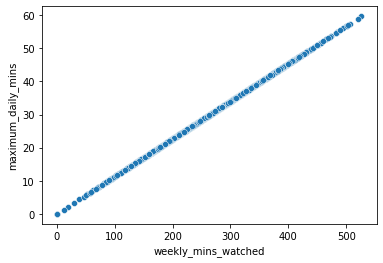

In [120]:
sns.scatterplot(x=df['weekly_mins_watched'],y=df['maximum_daily_mins']) # we can drop one of the feature here to avoid multicoliinearity

In [121]:
df = df.drop(['weekly_mins_watched'],axis=1)

In [122]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,10.9,27.54,83,7,3.0,1,0.0


### Imbalanced dataset, need to balance it

### Encoding Categorical variables

In [123]:
lst_string = list(df.select_dtypes(include='object'))
lst_string

['gender', 'multi_screen', 'mail_subscribed']

In [124]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,10.9,27.54,83,7,3.0,1,0.0


In [125]:
def label_encoding(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    elif x == 'no':
        return 0
    elif x == 'yes':
        return 1
    else:
        return -1


In [126]:
df['gender'] = df['gender'].apply(lambda x: label_encoding(x))

In [127]:
df['multi_screen'] = df['multi_screen'].apply(lambda x: label_encoding(x)) 

In [128]:
df['mail_subscribed'] = df['mail_subscribed'].apply(lambda x: label_encoding(x)) 

In [129]:
df.head(10)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,1,36,62,0,0,12.2,16.81,82,1,4.0,1,0.0
1,1,39,149,0,0,7.7,33.37,87,3,3.0,2,0.0
2,1,65,126,0,0,11.9,9.89,91,1,4.0,5,1.0
3,1,24,131,0,1,9.5,36.41,102,4,3.0,3,0.0
4,1,40,191,0,0,10.9,27.54,83,7,3.0,1,0.0
5,0,31,65,0,0,12.7,21.95,111,6,4.0,4,1.0
6,0,54,59,0,0,10.2,27.12,106,4,3.0,0,0.0
7,1,40,50,0,0,5.6,22.29,88,9,3.0,5,1.0
8,0,61,205,0,1,7.8,29.89,64,5,3.0,2,0.0
9,0,31,63,0,0,12.3,35.90,58,2,4.0,0,0.0


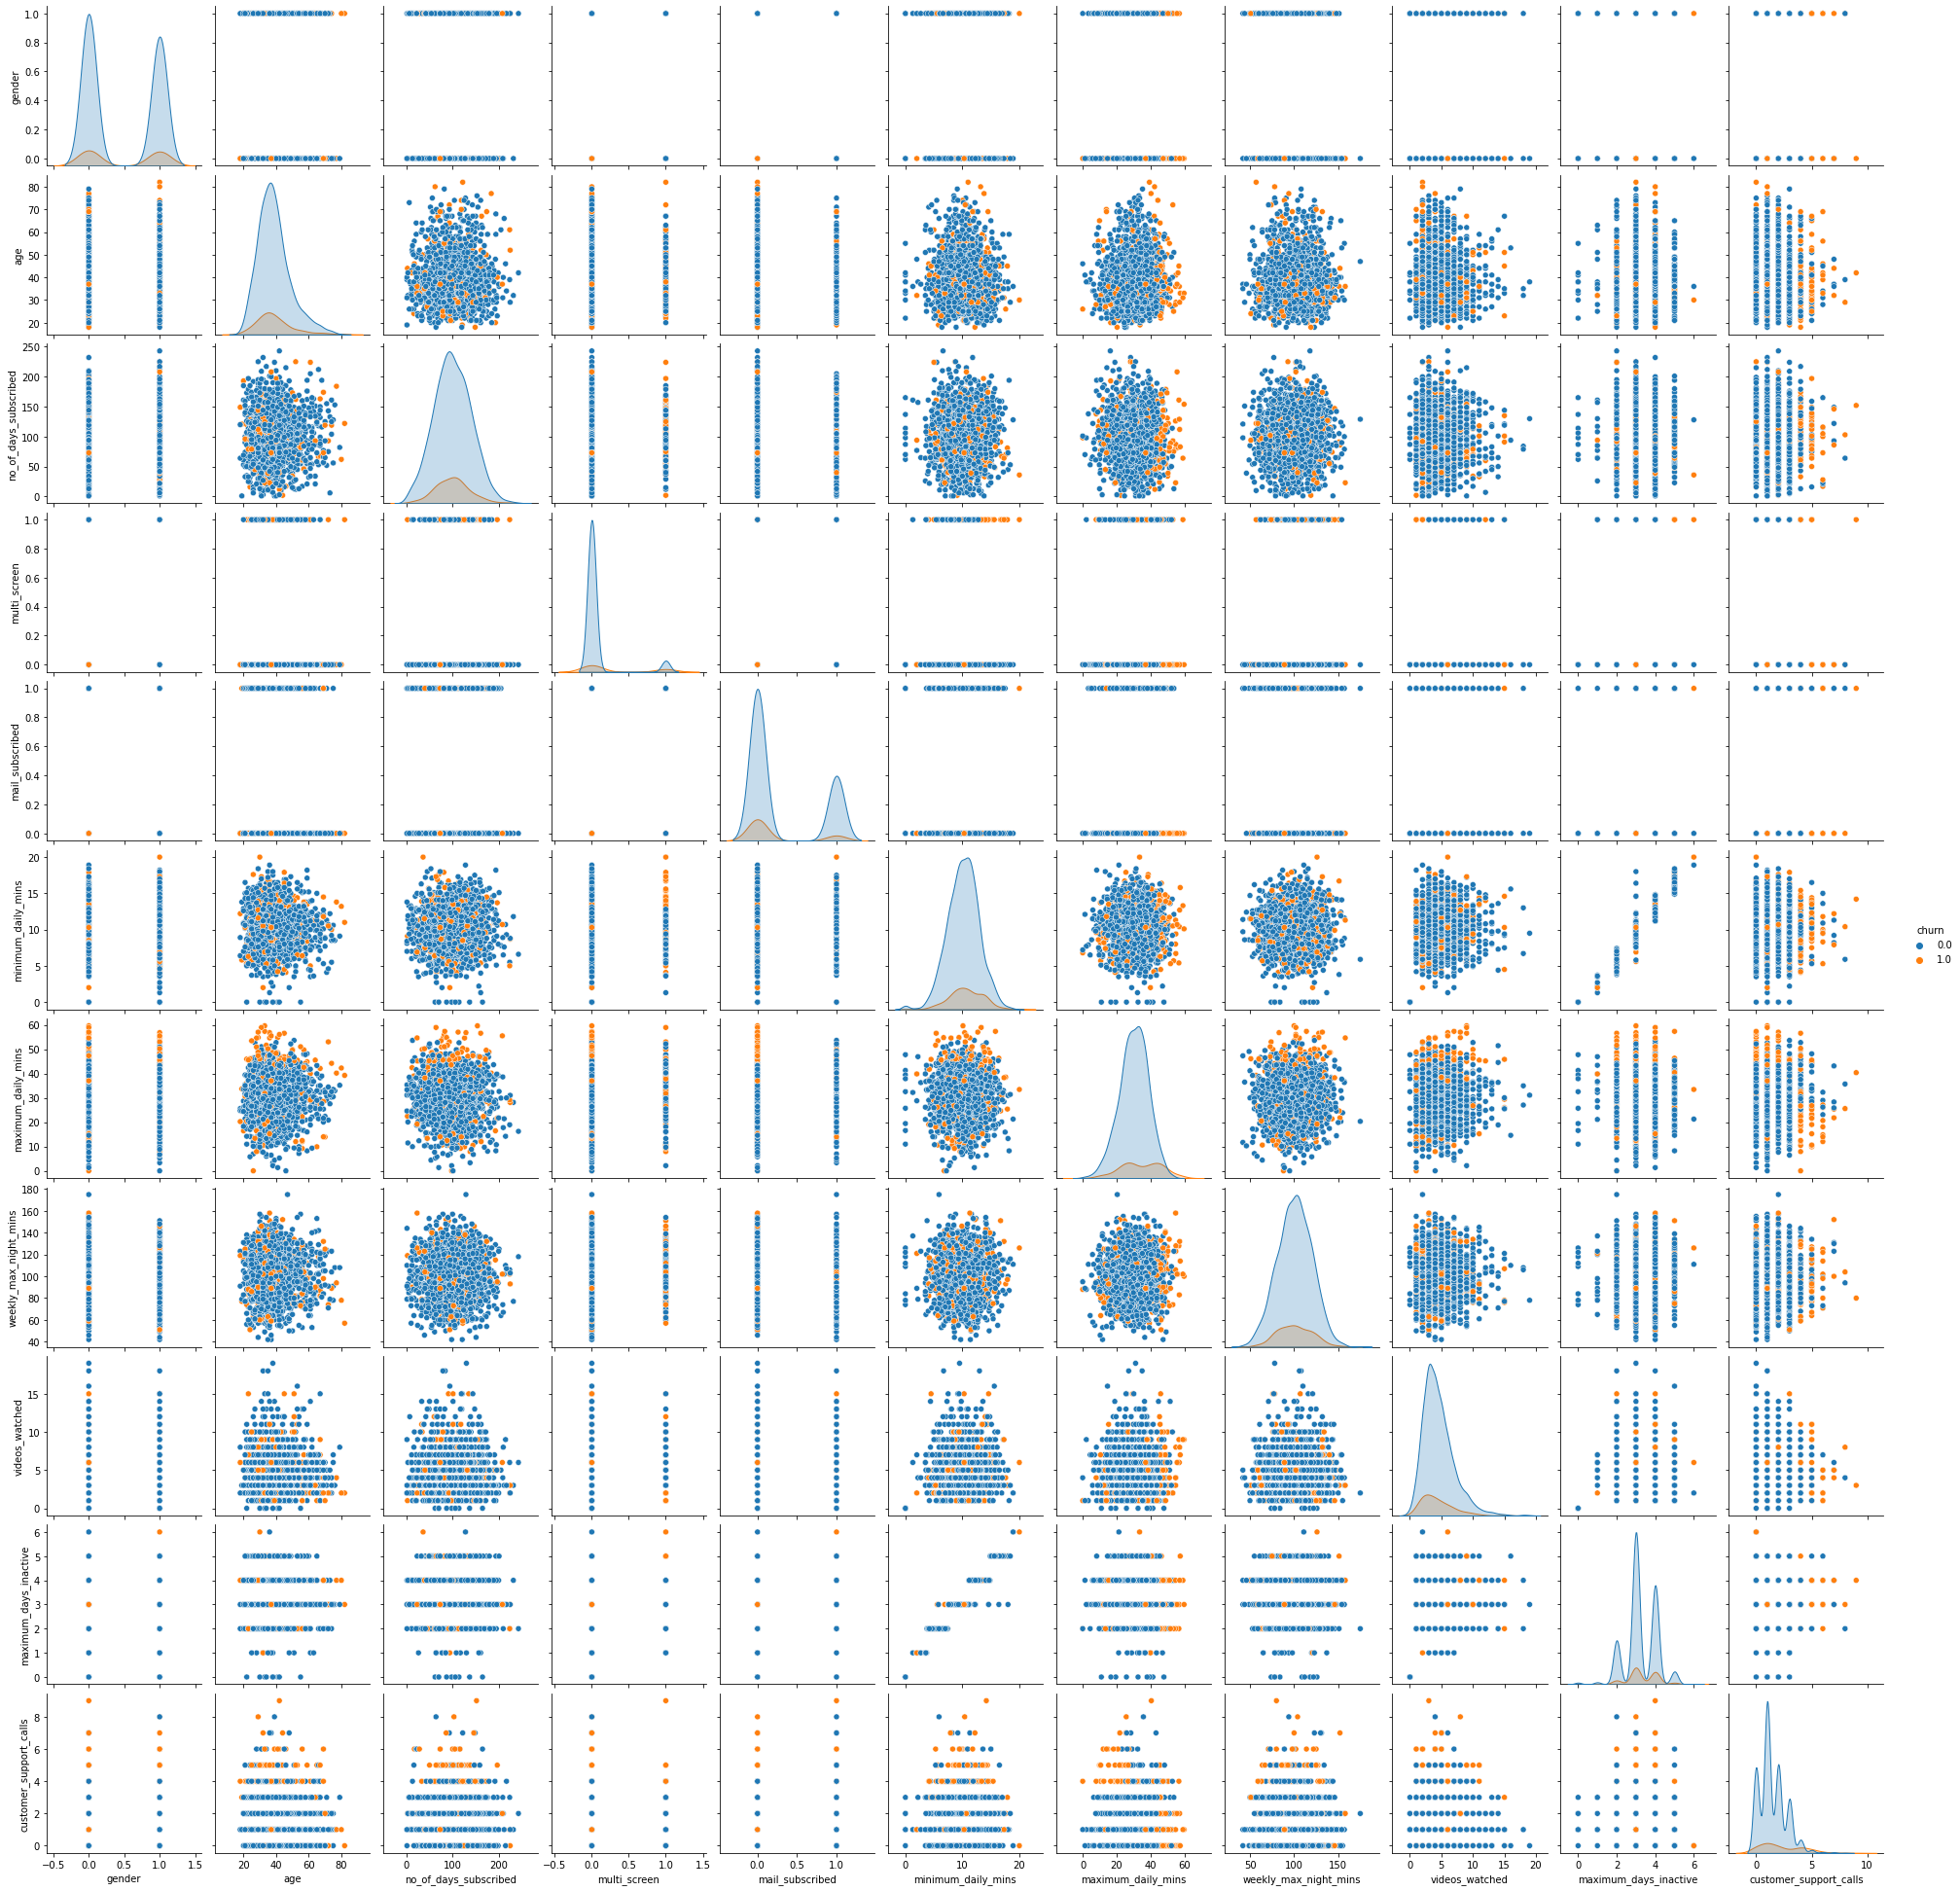

In [130]:
sns.pairplot(df,hue='churn')

In [131]:
df.dtypes

gender                      int64
age                         int64
no_of_days_subscribed       int64
multi_screen                int64
mail_subscribed             int64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

## Building Logistic Regression Model and handling class imbalance

In [132]:
import statsmodels.api as sm

X = df.drop('churn',axis=1)
y=df['churn'] # the target variable 
logit_model=sm.Logit(y,X) 
result=logit_model.fit() # fit the model 
print(result.summary2()) # check for summary 

Optimization terminated successfully.
         Current function value: 0.340411
         Iterations 7
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.133     
Dependent Variable:    churn             AIC:               1359.8148 
Date:                  2022-12-04 09:29  BIC:               1421.2305 
No. Observations:      1965              Log-Likelihood:    -668.91   
Df Model:              10                LL-Null:           -771.61   
Df Residuals:          1954              LLR p-value:       1.2077e-38
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        7.0000                                         
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
gender                 -0.0200   0.1408 -0.1417 0.8873 -0.2959  0.2560
age

## some key observations here
### 1. r2 square is 13%, so not a good model ideally
### 2. gender is not statistically significant since P-value is greater than standard value of alpha(0.05)

## Lets check the model from sklearn library

In [133]:
from sklearn.model_selection import train_test_split
X = df.drop('churn',axis=1)
y = df['churn']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report

logreg = LogisticRegression(random_state = 13)
logreg.fit(X_train, y_train) # fit the model

y_pred = logreg.predict(X_test) # make predictions on th test data
logit_roc_auc = roc_auc_score(y_test,y_pred)
print(classification_report(y_test, y_pred)) # check for classification report 
print("The area under the curve is: %0.2f"%logit_roc_auc)  # check for  AUC

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       509
         1.0       0.62      0.12      0.21        81

    accuracy                           0.87       590
   macro avg       0.75      0.56      0.57       590
weighted avg       0.84      0.87      0.83       590

The area under the curve is: 0.56


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### We can see from above report that even though accuracy is 87%, recall and precision is bad. Also the AUC is not that great too.

### This is because our dataset is highly imbalanced as we discussed earlier, so first need to balance it and then build the model

In [136]:
logreg = LogisticRegression(random_state = 13,class_weight = 'balanced')

In [137]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=13)

In [138]:
y_pred = logreg.predict(X_test) # predict on test data
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score
print(classification_report(y_test, y_pred)) 
print("The area under the curve is: %0.2f"%logit_roc_auc) # AUC curve

              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82       509
         1.0       0.30      0.75      0.43        81

    accuracy                           0.73       590
   macro avg       0.62      0.74      0.62       590
weighted avg       0.86      0.73      0.77       590

The area under the curve is: 0.74


## Building Decision Tree model

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from imblearn.over_sampling import SMOTE

### using smote to balance the dataset

In [140]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [141]:
dectree = DecisionTreeClassifier(random_state = 13,criterion = 'entropy')
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=13)

In [142]:
y_pred = dectree.predict(X_test)
dectree_roc_auc = roc_auc_score(y_test, dectree.predict(X_test))
print(classification_report(y_test, y_pred))
print("The area under the curve is: %0.2f"%dectree_roc_auc)

              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88       509
         1.0       0.35      0.54      0.43        81

    accuracy                           0.80       590
   macro avg       0.63      0.69      0.65       590
weighted avg       0.84      0.80      0.82       590

The area under the curve is: 0.69


In [143]:
def plot_model(model,class_names,max_depth=None,figsize=(20,20),fontsize=1):
    plt.figure(figsize=figsize)
    tree.plot_tree(dectree
                   ,feature_names = dectree.feature_names_in_
                   ,fontsize=fontsize
                   ,max_depth = max_depth
                   ,class_names=class_names
                   ,filled = True);

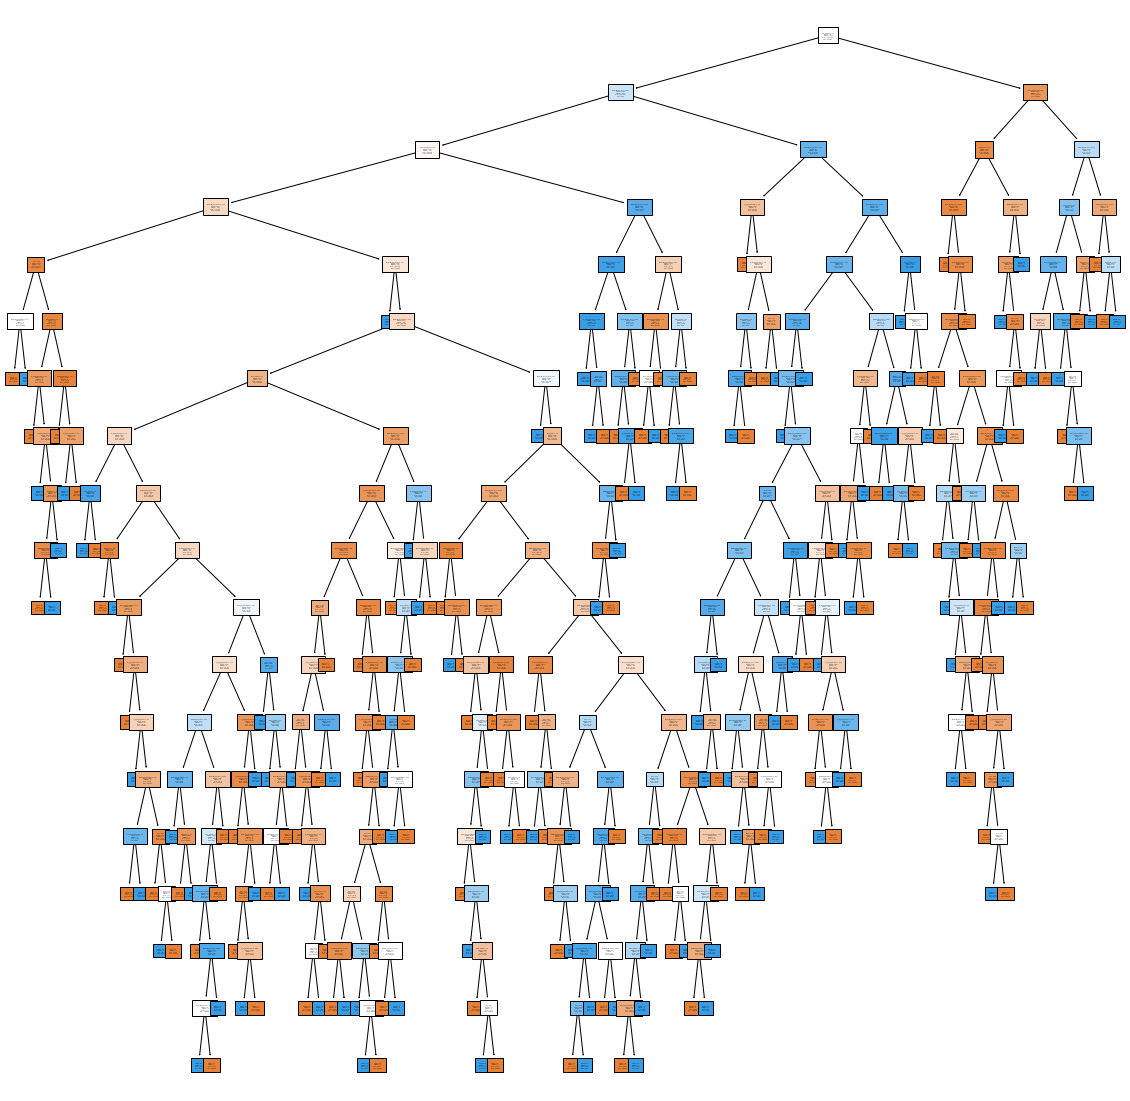

In [144]:
plot_model(dectree,['not churn','churn'])

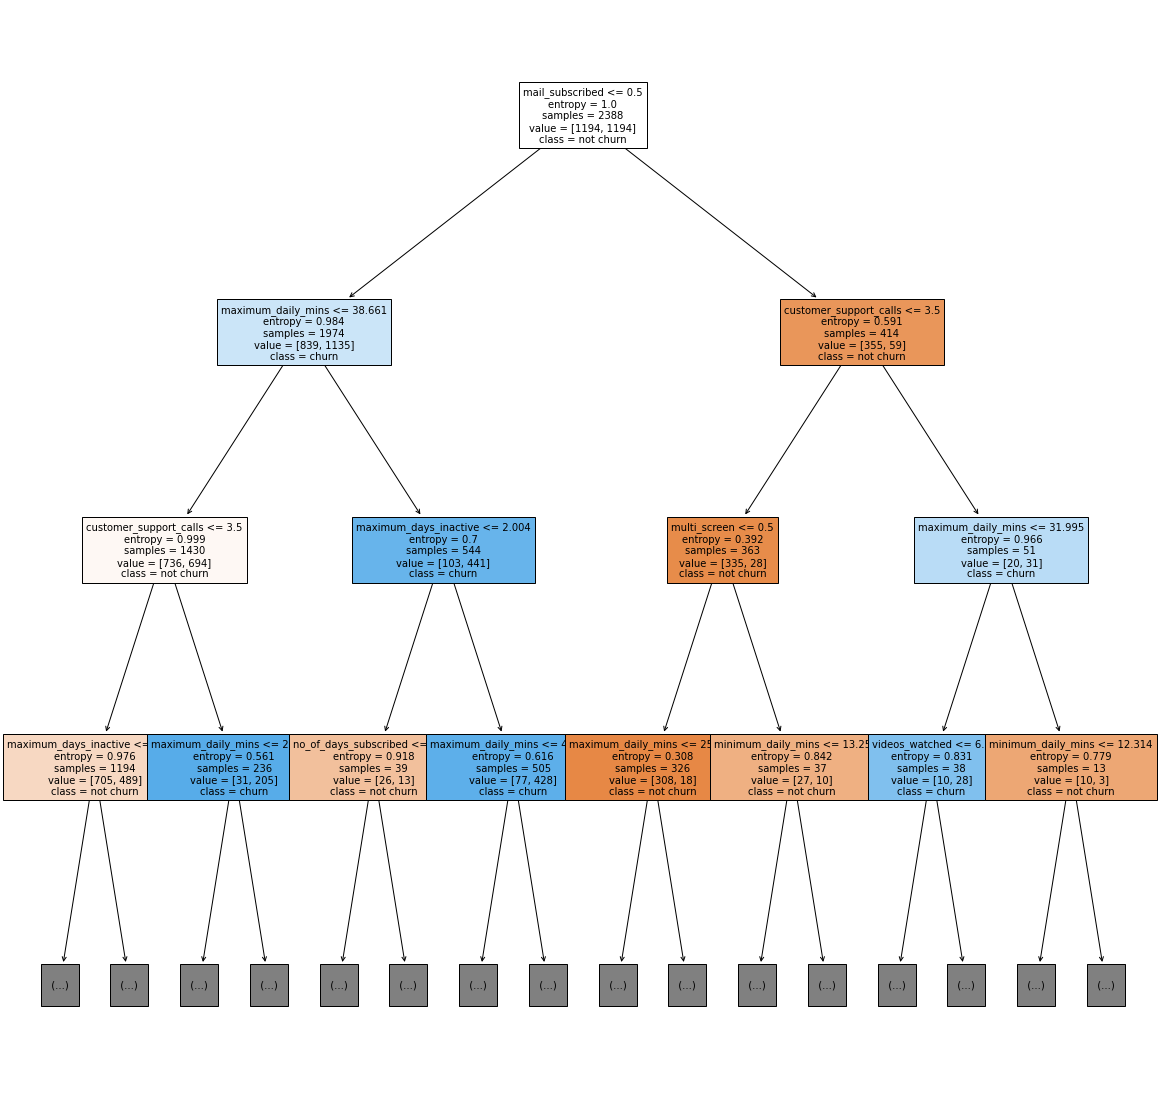

In [145]:
plot_model(dectree,['not churn','churn'],max_depth = 3,figsize=(20,20),fontsize=10)

In [146]:
def plot_feature_importances(model):
  feature_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
  feature_importances = feature_importances.sort_values(axis=0, ascending=False)
  fig, ax = plt.subplots()
  feature_importances.plot.bar()
  ax.set_title("Feature importances")
  fig.tight_layout()

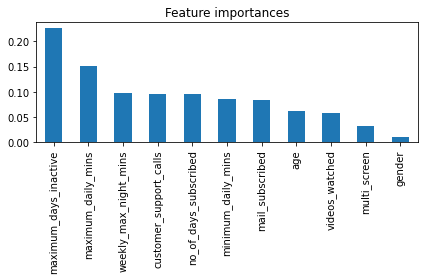

In [147]:
plot_feature_importances(dectree)

## Building the model using Ensemble learning- Bagging (Random Forest) and Boosting

### Random Forest- Bagging

In [148]:
from sklearn.ensemble import RandomForestClassifier

### Hypeparameter Tuning

In [149]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [150]:
randomforest = RandomForestClassifier()

In [151]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = randomforest,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [152]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [153]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': False}  



In [154]:
randomforest = RandomForestClassifier(n_estimators = 100, min_samples_split= 2, min_samples_leaf = 1, max_features = 'sqrt',
                                      max_depth =  120, bootstrap =  True)

randomforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=120, max_features='sqrt')

In [155]:
y_pred = randomforest.predict(X_test)
randomforest_roc_auc = roc_auc_score(y_test, randomforest.predict(X_test))
print(classification_report(y_test, y_pred))
print("The area under the curve is: %0.2f"%randomforest_roc_auc)

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       509
         1.0       0.52      0.53      0.52        81

    accuracy                           0.87       590
   macro avg       0.72      0.73      0.72       590
weighted avg       0.87      0.87      0.87       590

The area under the curve is: 0.73


### AdaBoost- Boosting

In [156]:
from sklearn.ensemble import AdaBoostClassifier

In [157]:
adaboost = AdaBoostClassifier(n_estimators = 100)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [158]:
y_pred = adaboost.predict(X_test)
adaboost_roc_auc = roc_auc_score(y_test, adaboost.predict(X_test))
print(classification_report(y_test, y_pred))
print("The area under the curve is: %0.2f"%adaboost_roc_auc)

              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       509
         1.0       0.37      0.49      0.42        81

    accuracy                           0.82       590
   macro avg       0.64      0.68      0.66       590
weighted avg       0.84      0.82      0.83       590

The area under the curve is: 0.68


### Hyper-parameter Tuning

In [159]:
adaboost = AdaBoostClassifier(random_state = 96, base_estimator = RandomForestClassifier(random_state = 101),
                              n_estimators = 100,learning_rate = 0.01)

In [160]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=101),
                   learning_rate=0.01, n_estimators=100, random_state=96)

In [161]:
y_pred = adaboost.predict(X_test)
adaboost_roc_auc = roc_auc_score(y_test, adaboost.predict(X_test))
print(classification_report(y_test, y_pred))
print("The area under the curve is: %0.2f"%adaboost_roc_auc)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       509
         1.0       0.57      0.59      0.58        81

    accuracy                           0.88       590
   macro avg       0.75      0.76      0.76       590
weighted avg       0.88      0.88      0.88       590

The area under the curve is: 0.76


### With hyper-paramter tuning overall accuracy and precision/recall improved

## Gradient Boosting

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

In [163]:
gradientboost = GradientBoostingClassifier()
gradientboost.fit(X_train, y_train)

GradientBoostingClassifier()

In [198]:
gradientboost_roc_auc = roc_auc_score(y_test, gradientboost.predict(X_test))
print(classification_report(y_test, gradientboost.predict(X_test)))
print("The area under the curve is: %0.2f"%gradientboost_roc_auc)

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92       509
         1.0       0.52      0.60      0.56        81

    accuracy                           0.87       590
   macro avg       0.73      0.76      0.74       590
weighted avg       0.88      0.87      0.87       590

The area under the curve is: 0.76


## Evaluating all the model and performing Feature Importance

In [184]:
# define a fucntion for plotting the ROC curves
def roc_curve_eval(model):
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import roc_curve
  logreg_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
  #Setting the graph area
  plt.figure()
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])

  #Plotting the worst line possiple
  plt.plot([0, 1], [0, 1],'b--')

  #Plotting the logistic regression we have built
  plt.plot(fpr, tpr, color='darkorange', label='Model (area = %0.2f)' % logreg_roc_auc)

  #Adding labels and etc
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

In [191]:
def accuracy_report(model):
  model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  print(classification_report(y_test, model.predict(X_test)))
  print("The area under the curve is: %0.2f"%model_roc_auc)


In [185]:
def plot_feature_importances(model):
  feature_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
  feature_importances = feature_importances.sort_values(axis=0, ascending=False)
  fig, ax = plt.subplots()
  feature_importances.plot.bar()
  ax.set_title("Feature importances")
  fig.tight_layout()

              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82       509
         1.0       0.30      0.75      0.43        81

    accuracy                           0.73       590
   macro avg       0.62      0.74      0.62       590
weighted avg       0.86      0.73      0.77       590

The area under the curve is: 0.74


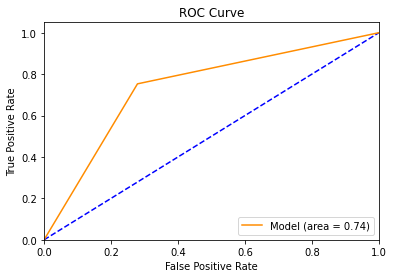

In [199]:
# log regression
accuracy_report(logreg)
roc_curve_eval(logreg)

              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88       509
         1.0       0.35      0.54      0.43        81

    accuracy                           0.80       590
   macro avg       0.63      0.69      0.65       590
weighted avg       0.84      0.80      0.82       590

The area under the curve is: 0.69


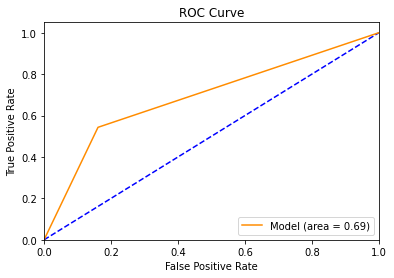

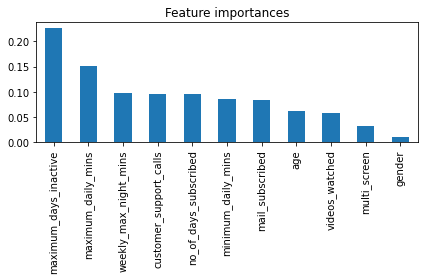

In [193]:
# decision tree
accuracy_report(dectree)
roc_curve_eval(dectree)
plot_feature_importances(dectree)


              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       509
         1.0       0.52      0.53      0.52        81

    accuracy                           0.87       590
   macro avg       0.72      0.73      0.72       590
weighted avg       0.87      0.87      0.87       590

The area under the curve is: 0.73


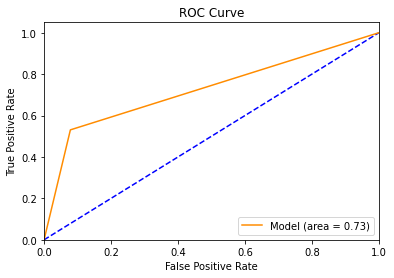

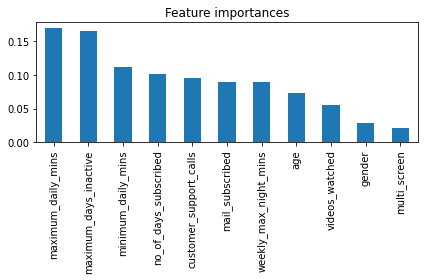

In [195]:
# Random Forest
accuracy_report(randomforest)
roc_curve_eval(randomforest)
plot_feature_importances(randomforest)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       509
         1.0       0.57      0.59      0.58        81

    accuracy                           0.88       590
   macro avg       0.75      0.76      0.76       590
weighted avg       0.88      0.88      0.88       590

The area under the curve is: 0.76


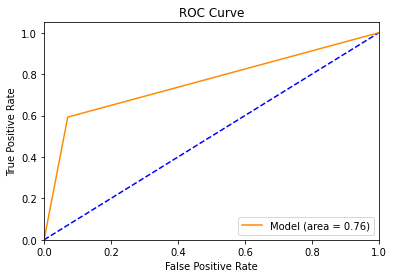

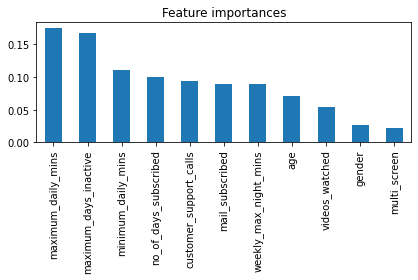

In [196]:
# Adaboost
accuracy_report(adaboost)
roc_curve_eval(adaboost)
plot_feature_importances(adaboost)

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92       509
         1.0       0.52      0.60      0.56        81

    accuracy                           0.87       590
   macro avg       0.73      0.76      0.74       590
weighted avg       0.88      0.87      0.87       590

The area under the curve is: 0.76


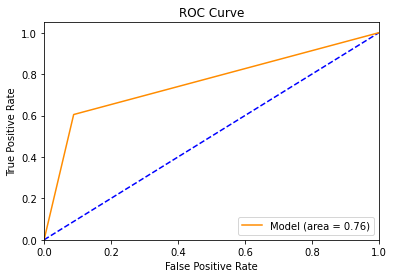

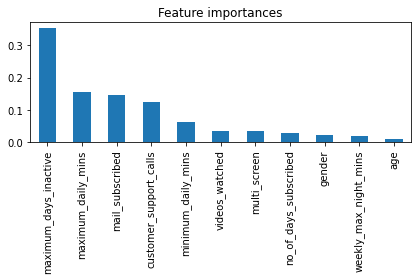

In [197]:
# Gradient Boost
accuracy_report(gradientboost)
roc_curve_eval(gradientboost)
plot_feature_importances(gradientboost)